In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Looking at Data and Data Preparation
My first step is to always look at some basic descriptors of the dataset, make sure the data loaded correctly, and format the data as necessary. 
After determining how I want my dataset to be formatted, I will make those formats in an python file that I will load in each notebook. Rather than load the raw dataset, I will load my python file.

### Loading Data

In [2]:
train_df = pd.read_csv('../data/kaggle_train.csv')

### Getting Basic Descriptors of Dataset 
I always start by making sure the loaded data matches the data description and get a general idea of the dataset in the process

#### Looking at Dimensions of Dataframe
The dataframe has 81 columns which matches the dataset description. According to the data description, the dataset includes 79 explanatory variables. This does not conflict with the loaded dataset because one column, `Id` does not contain an explanatory variable, and `SalePrice` is the target not an explantory variable.  

For reference, the description can be found in the doc directory of this repository.

In [3]:
dimensions = train_df.shape; print(dimensions)

(1460, 81)


In [4]:
train_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Preparation

#### Using `Id` Column to Index `ames_df`
It is good practice to index the dataframe. 
We will use the `Id` column to index the data frame and then drop that. It is unique and has no predictive value. 

First, we will check if the `Id` column is unique.

In [6]:
train_df[train_df.Id.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [7]:
train_df =  train_df.set_index('Id')

We can see that now the there is one less column, `Id`, in `train_df`.

In [8]:
train_df.shape

(1460, 80)

#### Renaming `3SsnPorch` to `ThreeSsnPorch`
It is easier to work with a column whose name does not start with an number character

In [9]:
train_df = train_df.rename(columns={ '3SsnPorch': 'ThreeSsnPorch'})

In [10]:
train_df.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

#### Classifying Numerical and Categorical Features

In [11]:
train_df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


#### Ordinal Categorical Features
The following features are ordinal, but that does not necessarily mean they should be numerical. There are two reasons why I am making the following ordinal features categorical.  
1. We cannot say with certainty that the difference between two consecutive values of these ordinal features is not the same as the difference between between two other consecutive values. Take OverallQual for example. It would be reasonable to say that the difference between a house with "OverallQual 4 Below Average" (data description) and a house with "OverallQual 5 Average" is not the same as the difference between a house with OverallQual being very excellent and a house with OverallQual being excellent. We would say there is diminishing returns.

2. We could scale the values to reflect the true relationship, but that will likely introduce a lot of error. It is better to not use the ordinality of these features than to use it incorrectly. 

>OverallQual (Ordinal): Rates the overall material and finish of the house
>
>       10	Very Excellent
>       9	Excellent
>       8	Very Good
>       7	Good
>       6	Above Average
>       5	Average
>       4	Below Average
>       3	Fair
>       2	Poor
>       1	Very Poor

In [12]:
def obj_to_ordinal(feat):
    order = ['none','Po','Fa','TA','Gd','Ex']
    if feat.isin(order).any():
        s = feat.fillna('none')
        s = pd.Categorical(s)
        s = s.set_categories(order, ordered = True)
    else:
        s = pd.Categorical(feat)
    return s

ordinal_f = ['MSSubClass' ,'OverallQual',
             'OverallCond',
             'FullBath','HalfBath',
             'BedroomAbvGr','KitchenAbvGr',
             'TotRmsAbvGrd','Fireplaces',
             'MoSold']
ordinal_df = train_df[ordinal_f].apply(obj_to_ordinal)
train_df = pd.concat([train_df.drop(columns = ordinal_f),
                      ordinal_df], axis='columns')

train_df[ordinal_f].dtypes

MSSubClass      category
OverallQual     category
OverallCond     category
FullBath        category
HalfBath        category
BedroomAbvGr    category
KitchenAbvGr    category
TotRmsAbvGrd    category
Fireplaces      category
MoSold          category
dtype: object

In [13]:
yr_feat = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
for y in yr_feat:
    no_bin_nones = train_df[y].isin(['none']) == False
    yrs = train_df[y][no_bin_nones].unique()

bins = list(range(1800, 2011, 10))
pd.options.display.max_rows = 10
train_df.YearBuilt = pd.cut(train_df.YearBuilt, bins)
train_df.YearRemodAdd = pd.cut(train_df.YearRemodAdd, bins)

no_bin_nones = train_df[y].isin(['none']) == False
train_df.GarageYrBlt[no_bin_nones] = pd.cut(train_df.GarageYrBlt[no_bin_nones], bins)

### Exploratory Data Analysis: Charts of Features v Target Variable

In [14]:
is_dtype_num = train_df.dtypes.isin([np.dtype('float64'), np.dtype('int64')])
num_feats = train_df.dtypes.index[is_dtype_num]
num_df = train_df[num_feats]

In [15]:
cat_df = train_df.drop(columns = num_feats)

#### Scatter Plots of Numerical Features v `SalePrice`

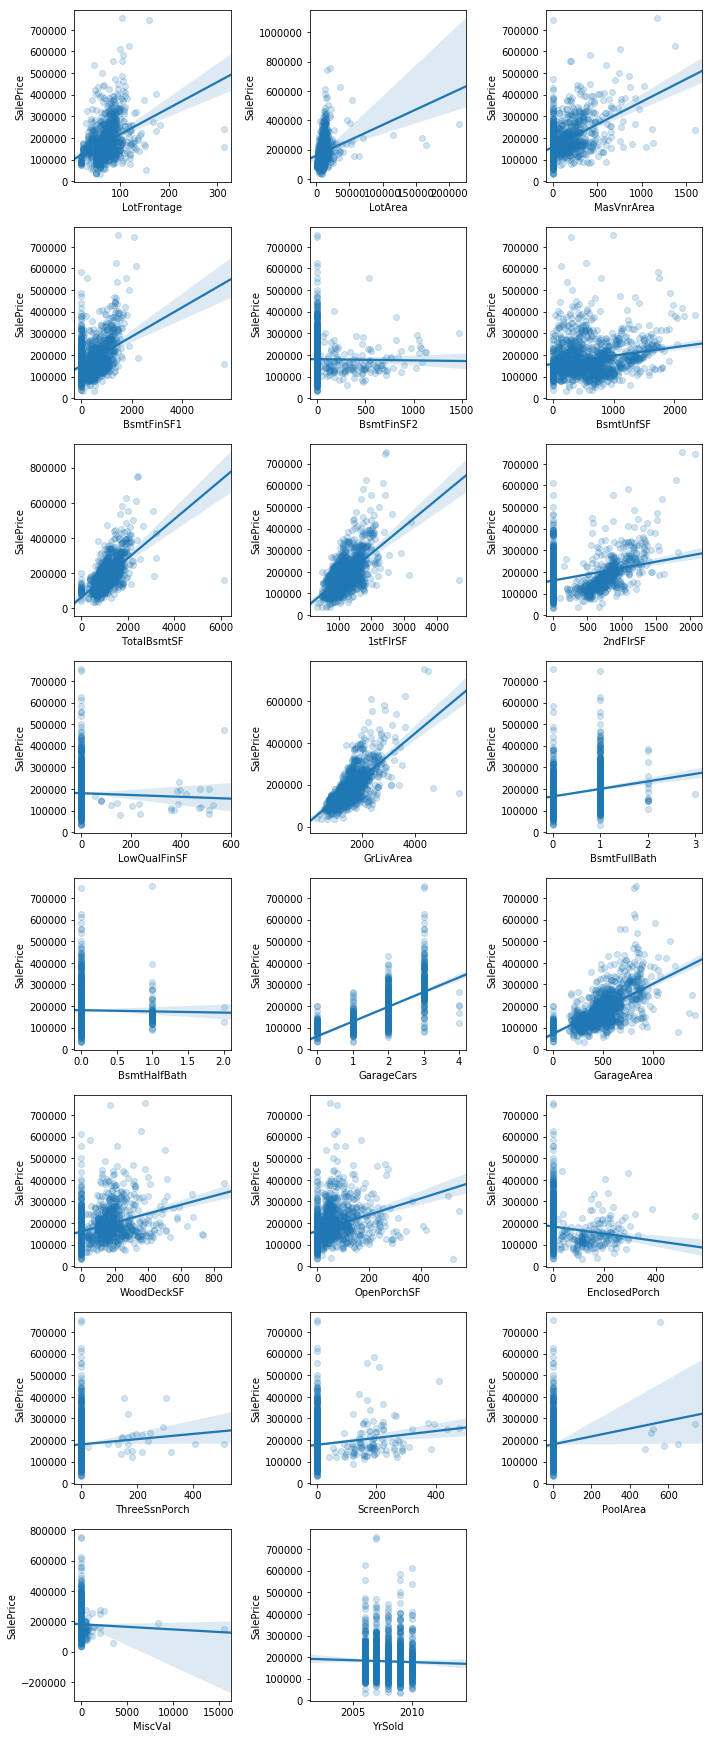

In [16]:
fig = plt.figure(figsize=(10,60))
for i, col in enumerate([f for f in num_feats if not f == 'SalePrice']):
    fig.add_subplot(20,3,i+1)
    sns.regplot(col, 
                train_df['SalePrice'],
                data=train_df,
                scatter_kws={'alpha': 0.2}
               )
fig.tight_layout()

#### Distribution of `SalePrice` by Feature 
The following plots show the distribution of `SalePrice` by feature. For example, the first plot is for `MSZoning`. The green plot shows the distribution of `SalePrice` filtered for rows where `MSZoning` = `C(all)`. The green vertical line shows the mean `SalePrice` of that subset. The means are spread out implying that `MSZoning` is related to `SalePrice`.

In [17]:
def count_box_plots(categories):
    for category in categories:
        print(category)
        values = train_df[category].unique()
        if len(values) > 6:
            f, (ax1, ax2) = plt.subplots(2,1, figsize = (12, 6))
        else:
            f, (ax1, ax2) = plt.subplots(1,2, figsize = (14, 3))
        
        not_string = train_df[category] != 'none'
        sns.countplot(x = train_df[category][not_string].sort_values(), 
                      ax=ax1)        
        xt = plt.xticks(rotation=45)
        
        sns.boxplot(x = train_df[category], 
                    y = train_df['SalePrice'],  
                    ax=ax2)
        xt = plt.xticks(rotation=45)        
        plt.show()

MSZoning


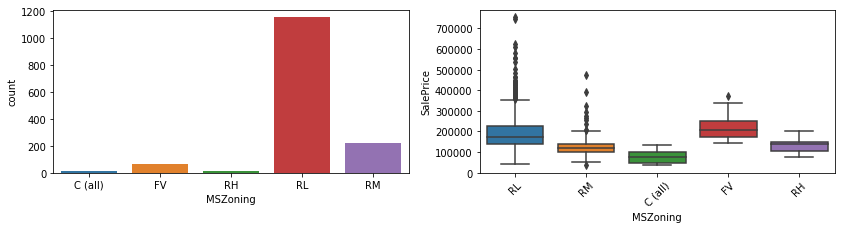

Street


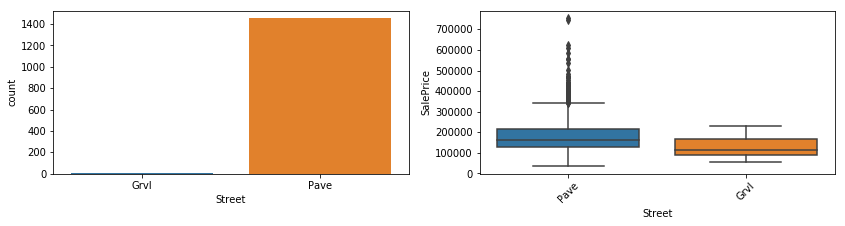

Alley


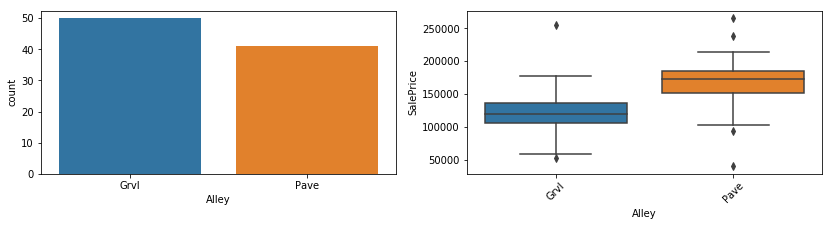

LotShape


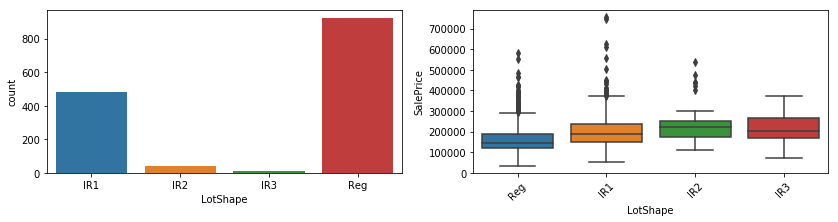

LandContour


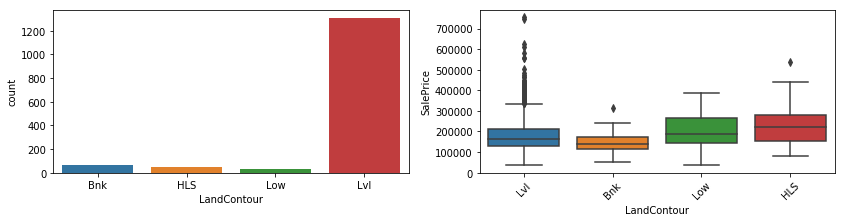

Utilities


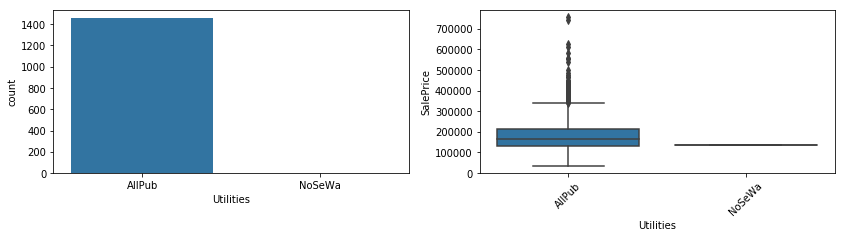

LotConfig


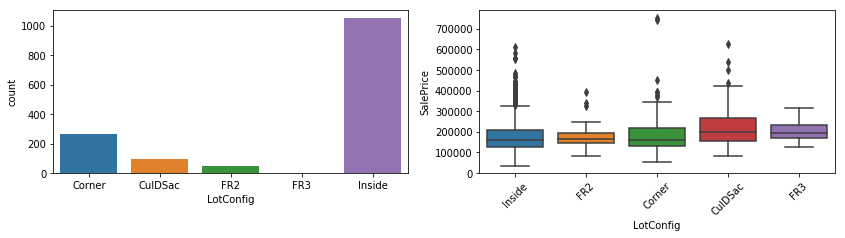

LandSlope


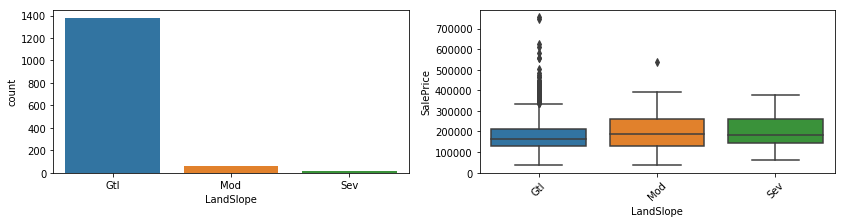

Neighborhood


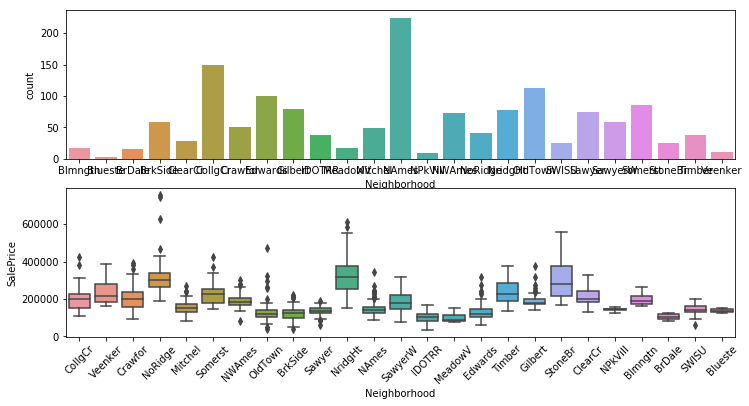

Condition1


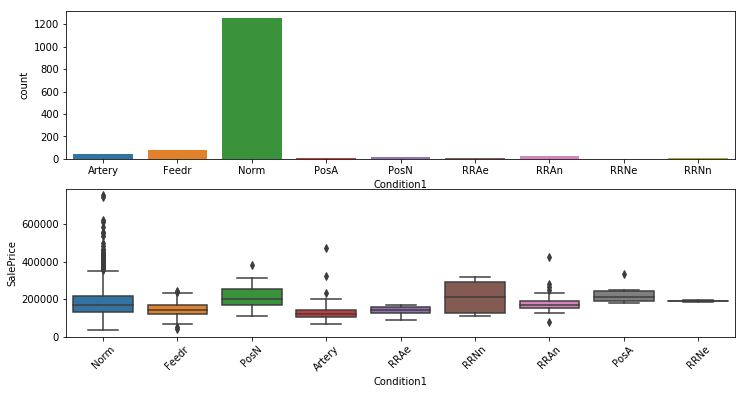

Condition2


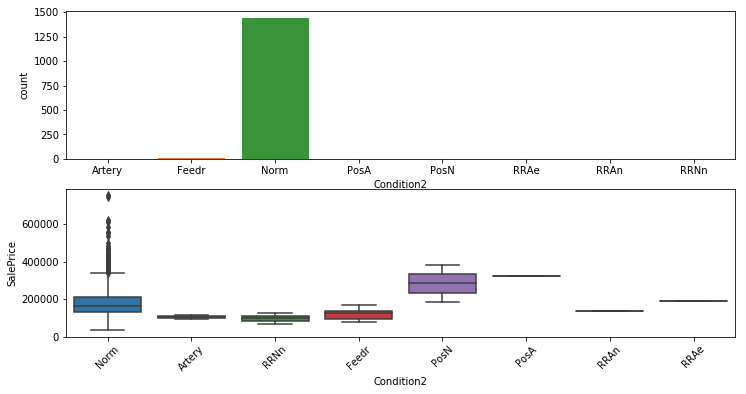

BldgType


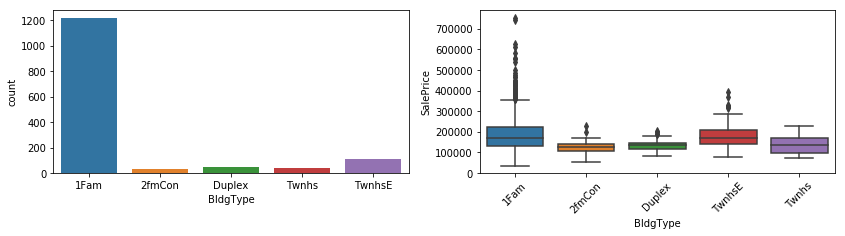

HouseStyle


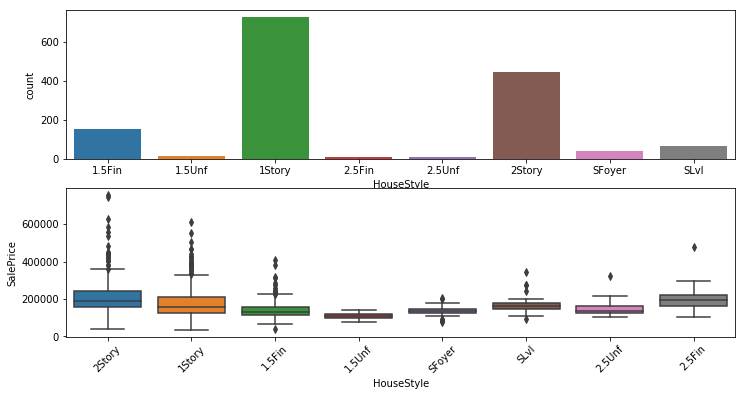

YearBuilt


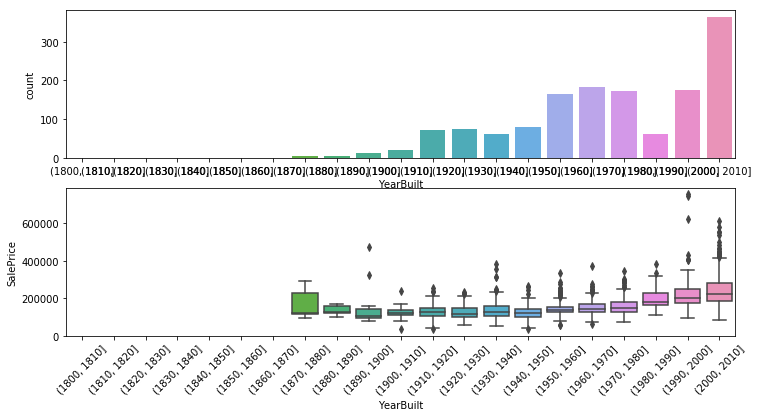

YearRemodAdd


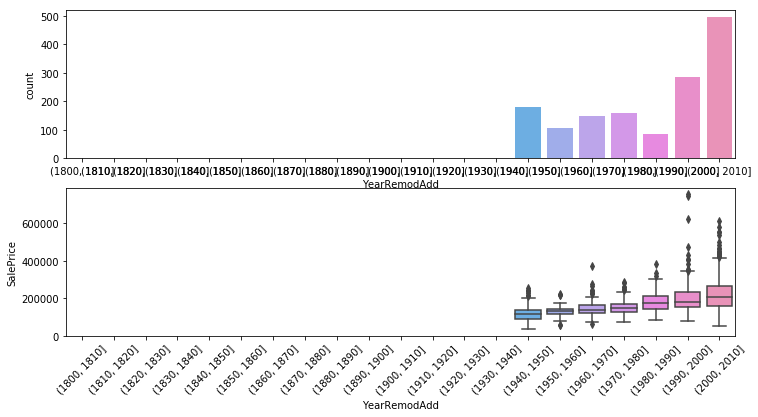

RoofStyle


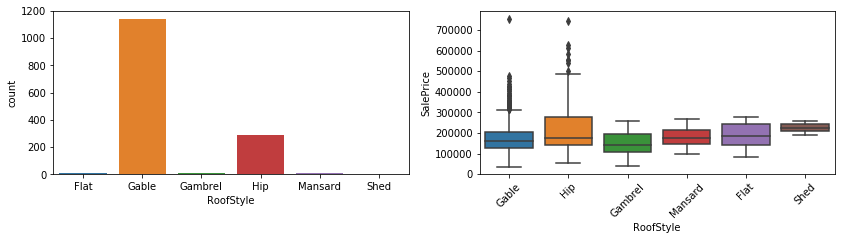

RoofMatl


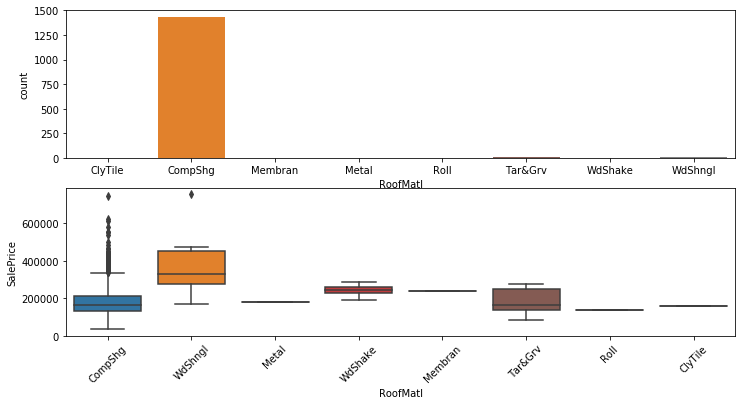

Exterior1st


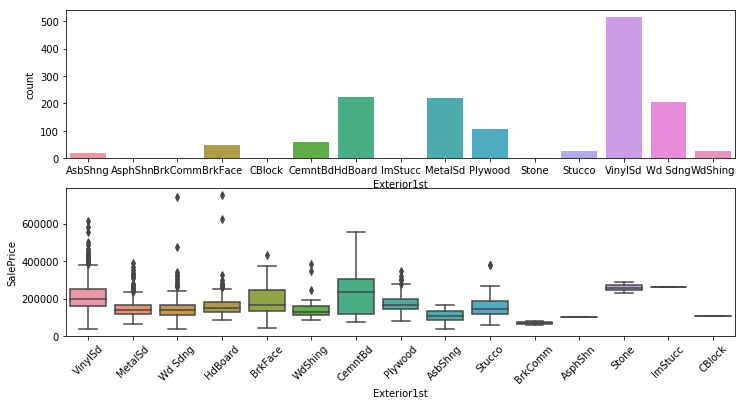

Exterior2nd


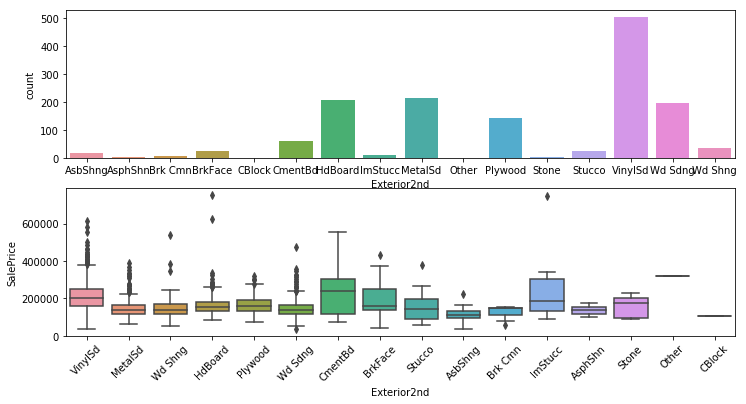

MasVnrType


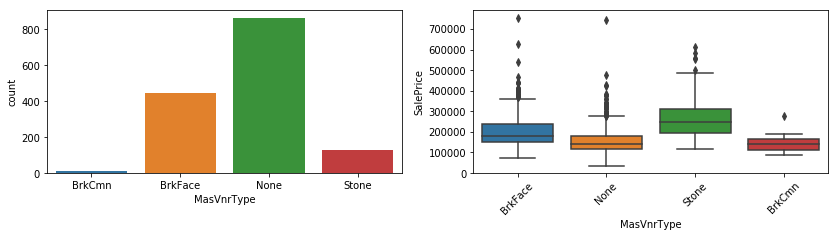

ExterQual


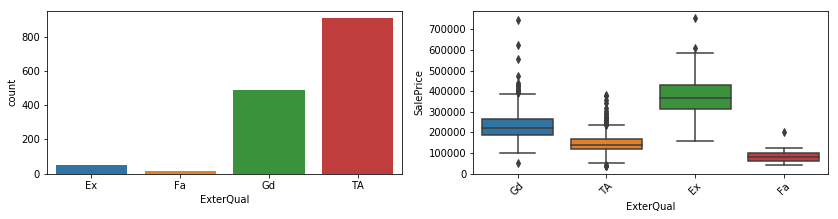

ExterCond


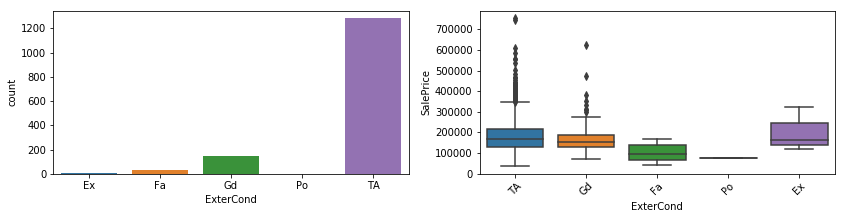

Foundation


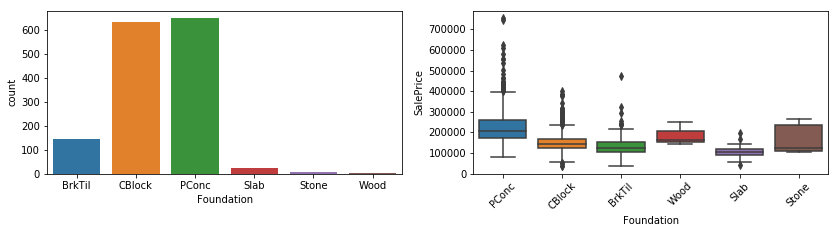

BsmtQual


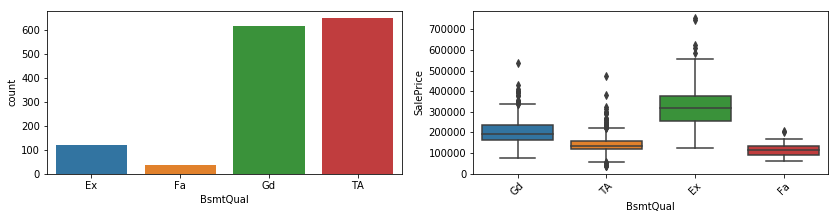

BsmtCond


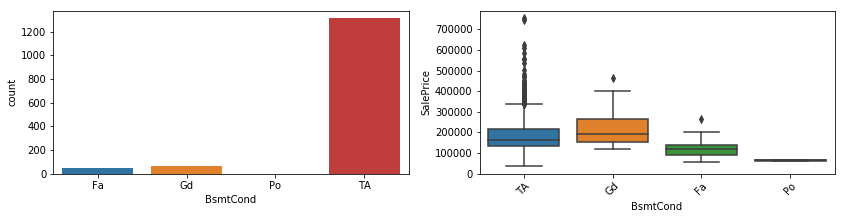

BsmtExposure


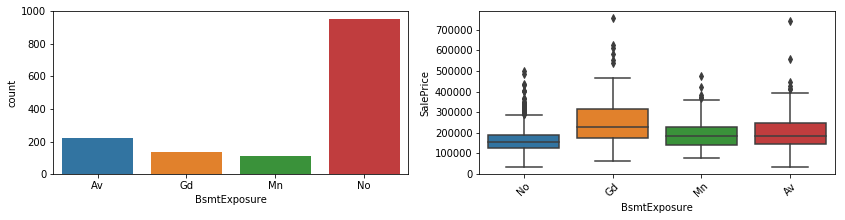

BsmtFinType1


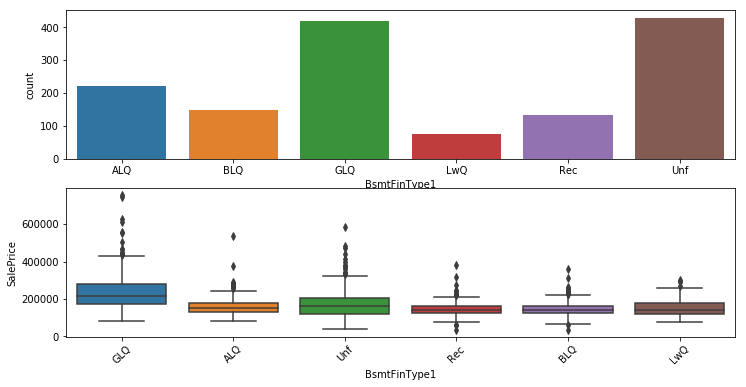

BsmtFinType2


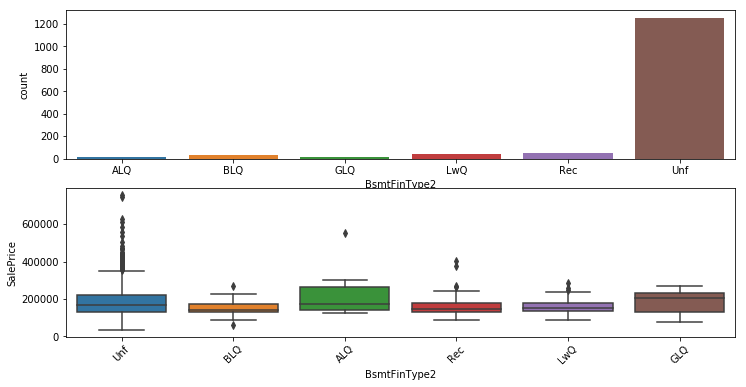

Heating


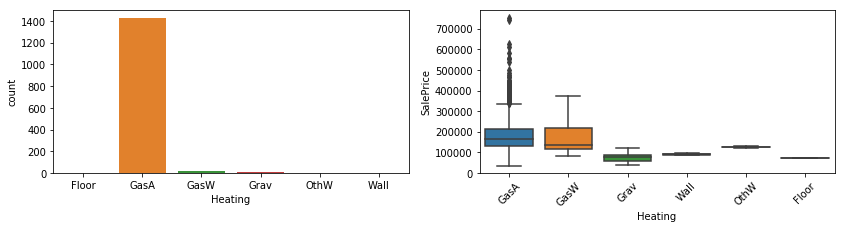

HeatingQC


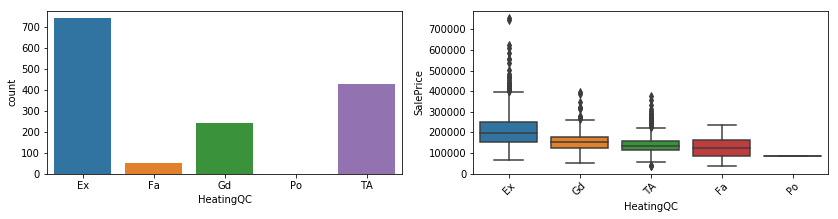

CentralAir


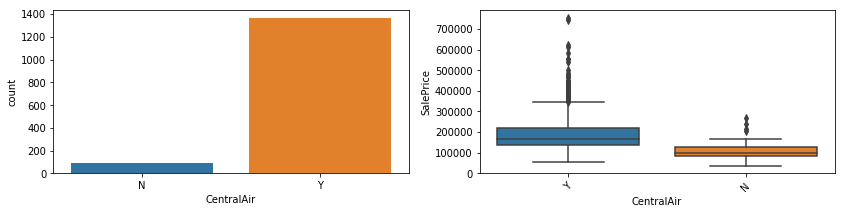

Electrical


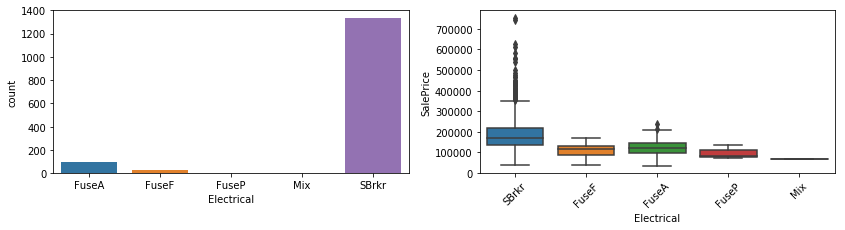

KitchenQual


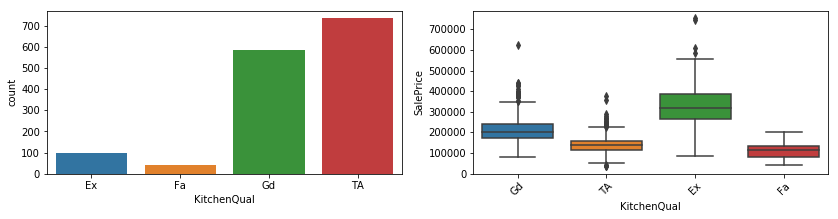

Functional


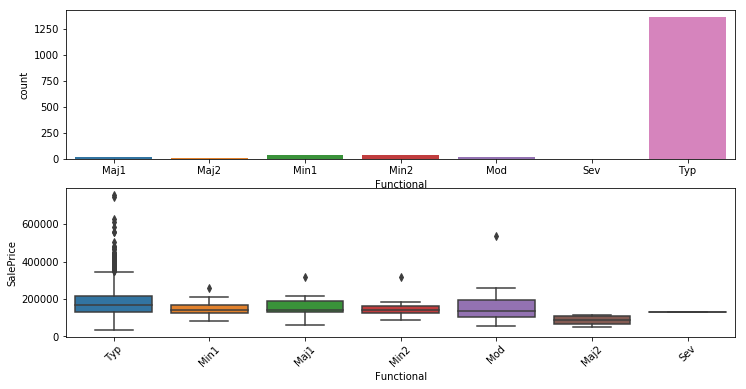

FireplaceQu


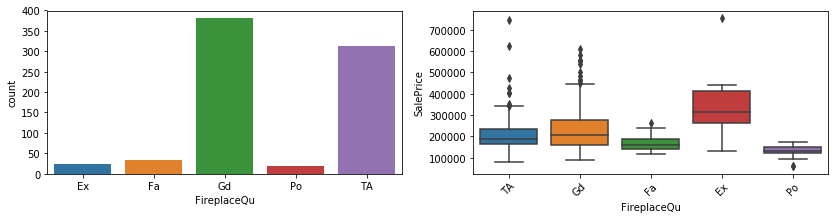

GarageType


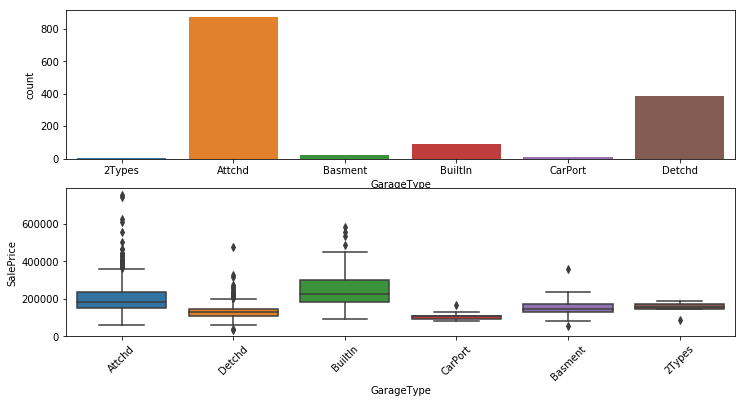

GarageYrBlt


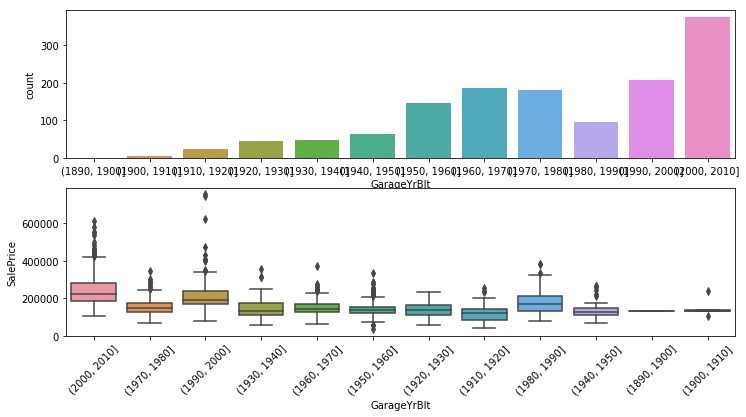

GarageFinish


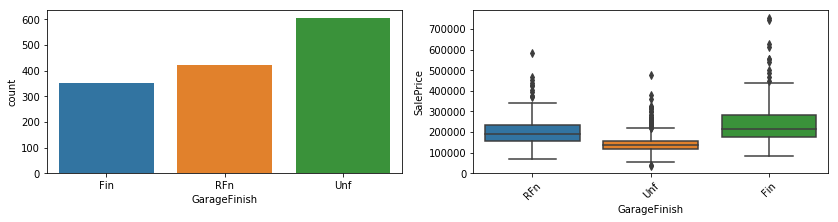

GarageQual


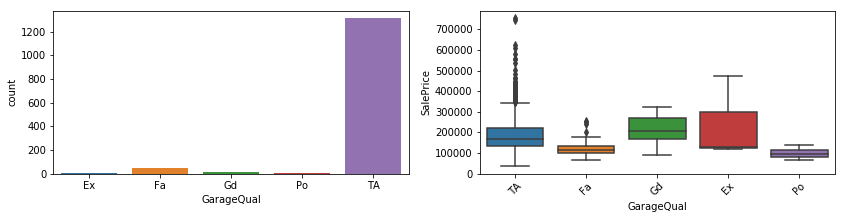

GarageCond


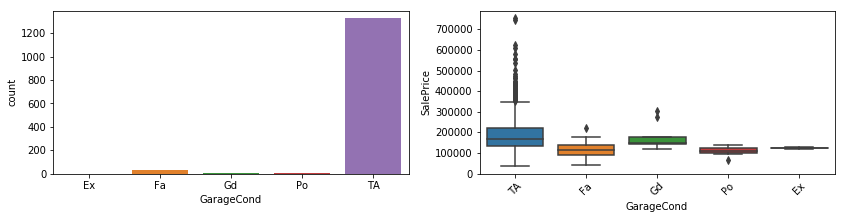

PavedDrive


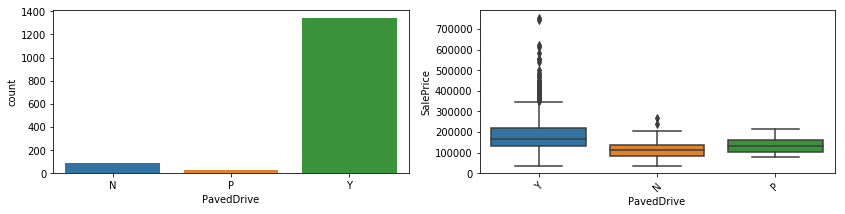

PoolQC


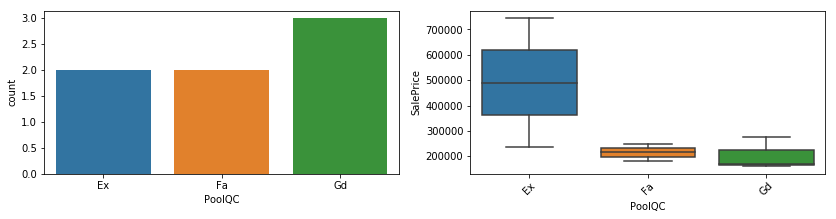

Fence


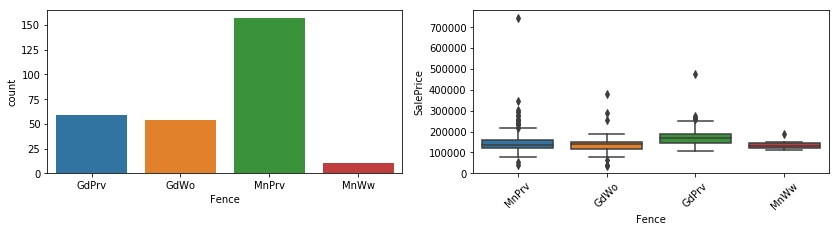

MiscFeature


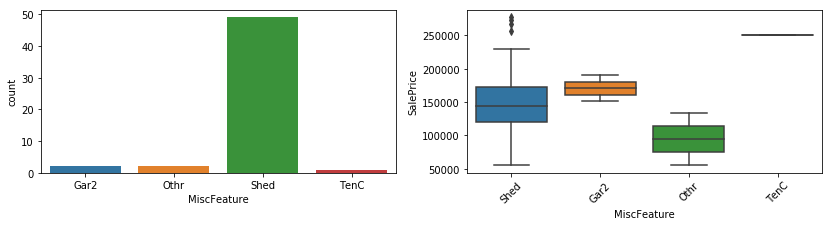

SaleType


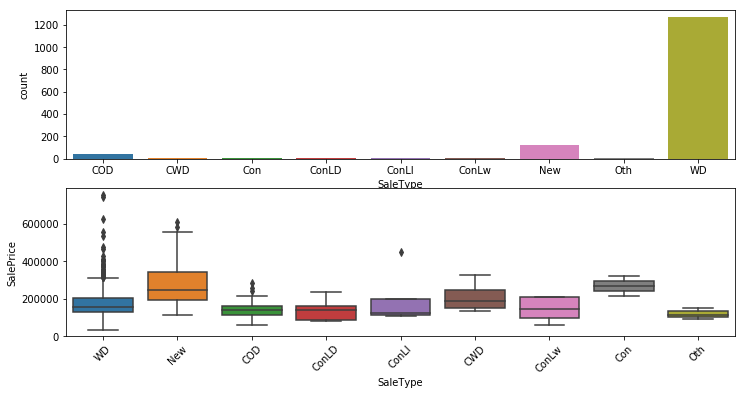

SaleCondition


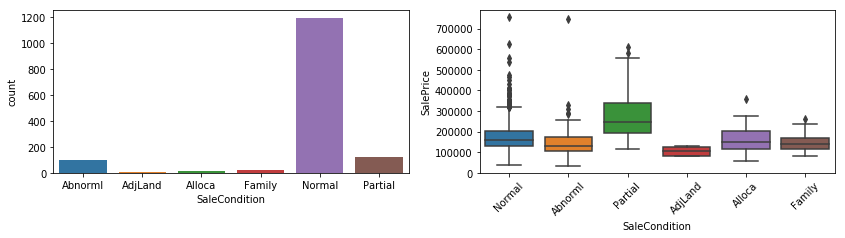

MSSubClass


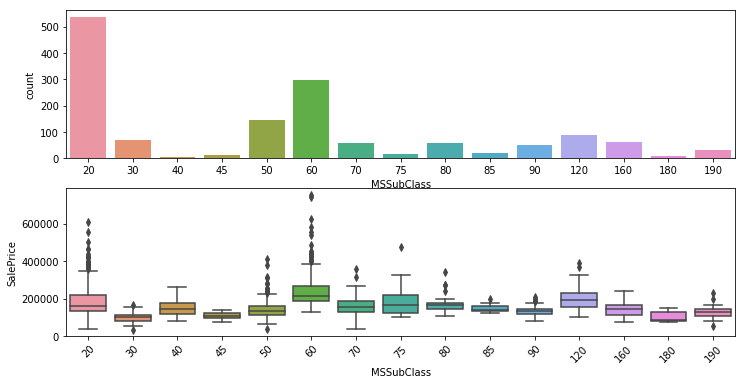

OverallQual


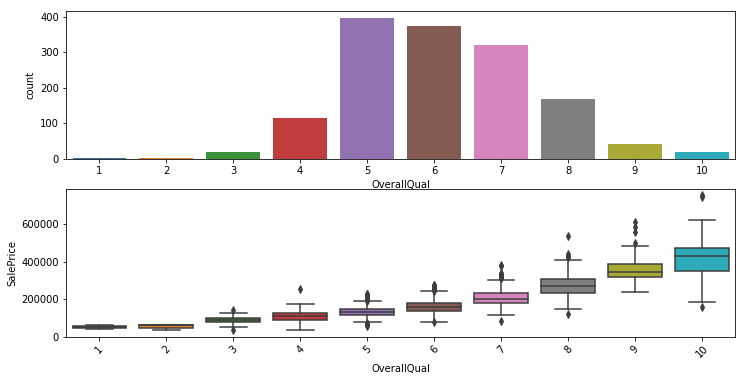

OverallCond


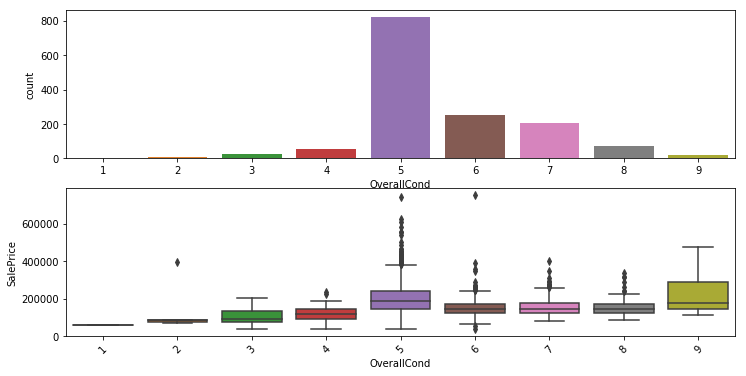

FullBath


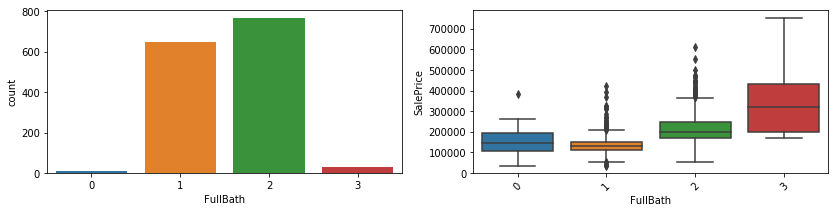

HalfBath


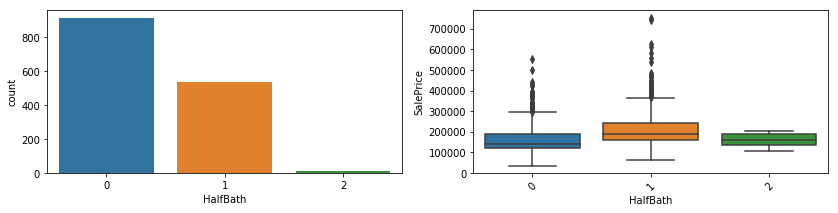

BedroomAbvGr


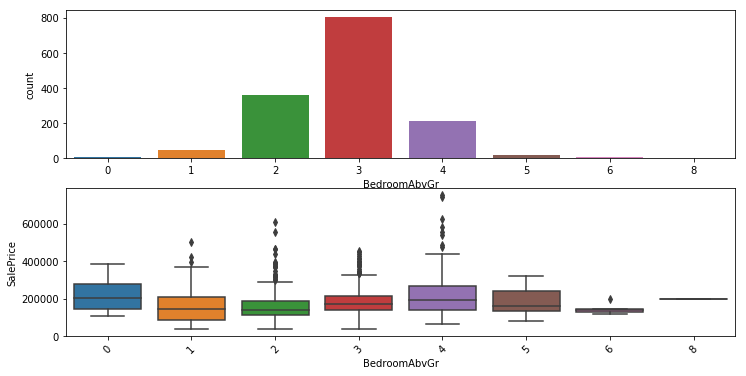

KitchenAbvGr


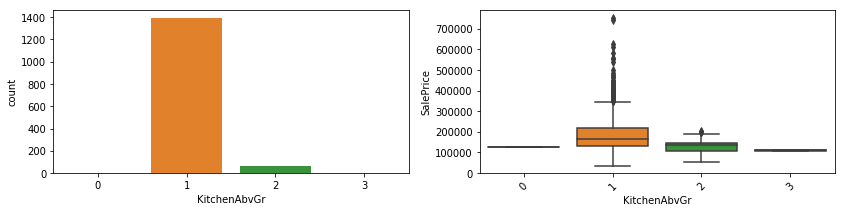

TotRmsAbvGrd


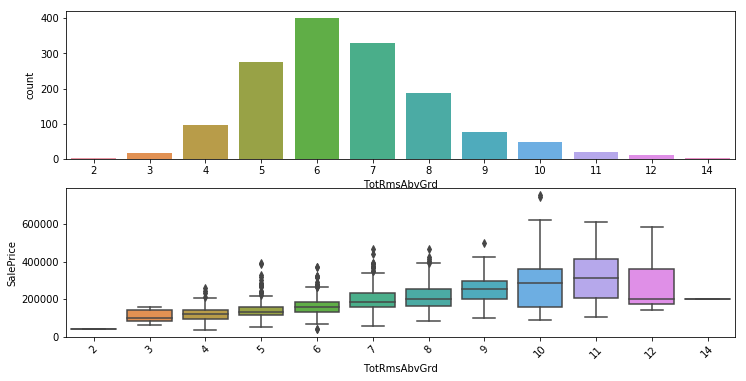

Fireplaces


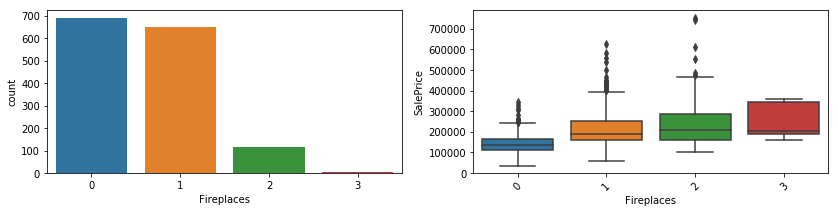

MoSold


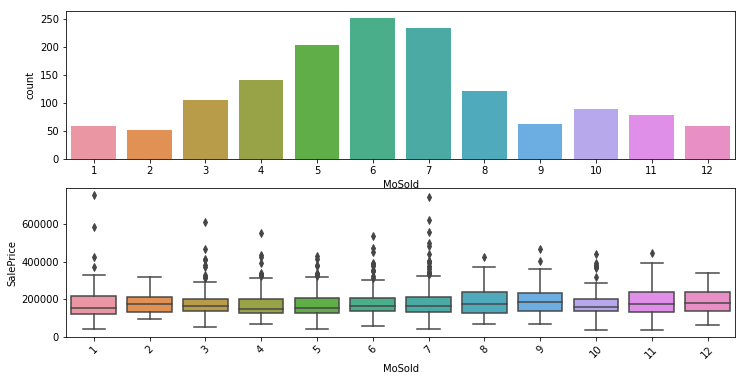

In [18]:
count_box_plots(cat_df.columns.values)

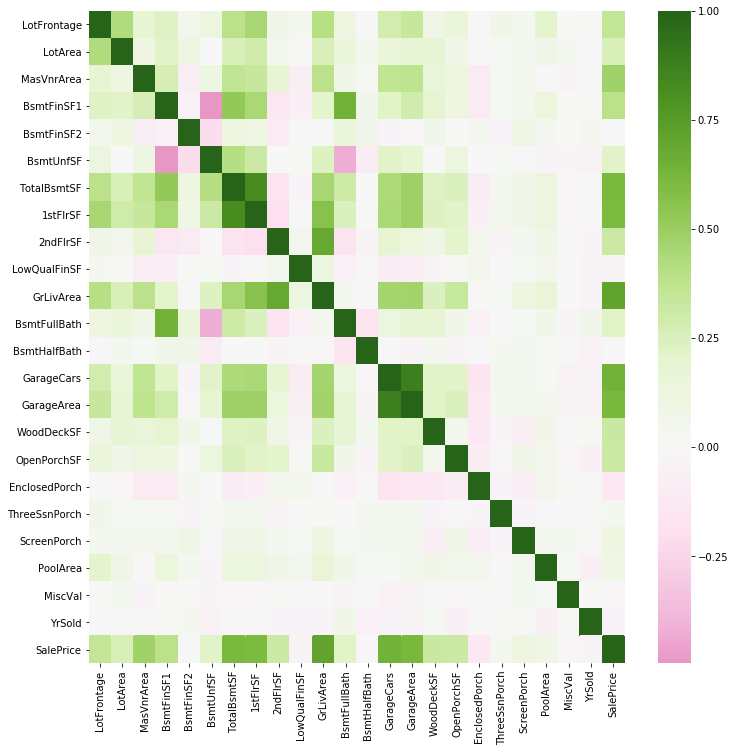

In [19]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(num_df.corr(), center=0, cmap = plt.get_cmap('PiYG'))

### Dropping Highly Correlated Features
These highly correlated features are not surprising. The size of a garage, `GarageArea`, would mean that it could fit more cars, so `GarageCars` is higher. The most obvious next step is to drop one of those two features and repeat with the following highly correlated pairs. 
However, we can use our domain knowledge, knowledge of housing, to hypothesize that perhaps we can drop all features describing floor space and replace it with another summarizing feature `TotLivArea`. We are only limiting ourselves to ten features.

In [20]:
## features where its correlation with another feature is greater than 0.5, not counting its correlation with itself which is 1
high_corr_count = num_df.corr()[num_df.corr() > 0.5][num_df.corr() < 1].count().sort_values(ascending = False)
high_corr_count = high_corr_count[high_corr_count>0]
high_corr_count

SalePrice       5
TotalBsmtSF     3
1stFlrSF        3
GrLivArea       3
GarageArea      2
BsmtFinSF1      2
GarageCars      2
2ndFlrSF        1
BsmtFullBath    1
dtype: int64

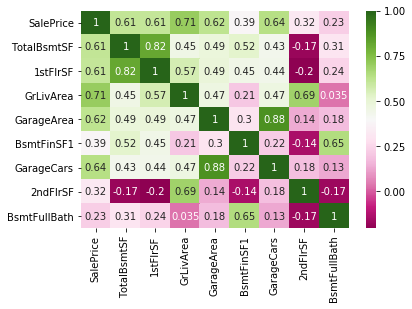

In [21]:
high_corr_feats = high_corr_count.index.values
sns.heatmap(train_df[high_corr_feats].corr(), annot = True, cmap = plt.get_cmap('PiYG'))

#### Replacing Highly Correlated Features About Floor Space With Stronger Feature
`GrLivArea` is highly correlated with `SalePrice`. Total living area which is the total basement area plus the ground living area is more correlated with `SalePrice`. Let's create a new column for total living area and drop the other features describing ground space.

In [22]:
sf = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
      '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
      'GarageArea', 'PoolArea', 'LotArea', 'OpenPorchSF',
      'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'WoodDeckSF']

train_df[sf + ['SalePrice']].corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
                   ...   
PoolArea         0.092404
ThreeSsnPorch    0.044584
BsmtFinSF2      -0.011378
LowQualFinSF    -0.025606
EnclosedPorch   -0.128578
Name: SalePrice, Length: 17, dtype: float64

##### Pairplot 
The pairplot further underscores that there is a linear relationship between these features. The diagonal shows histograms. `TotLivArea` is also better because it has a more normal distribution than the features that I'm removing. 

In [23]:
train_df['TotLivArea'] = train_df.GrLivArea + train_df.TotalBsmtSF
train_df['NonLivArea'] = train_df.LotArea - train_df.TotLivArea

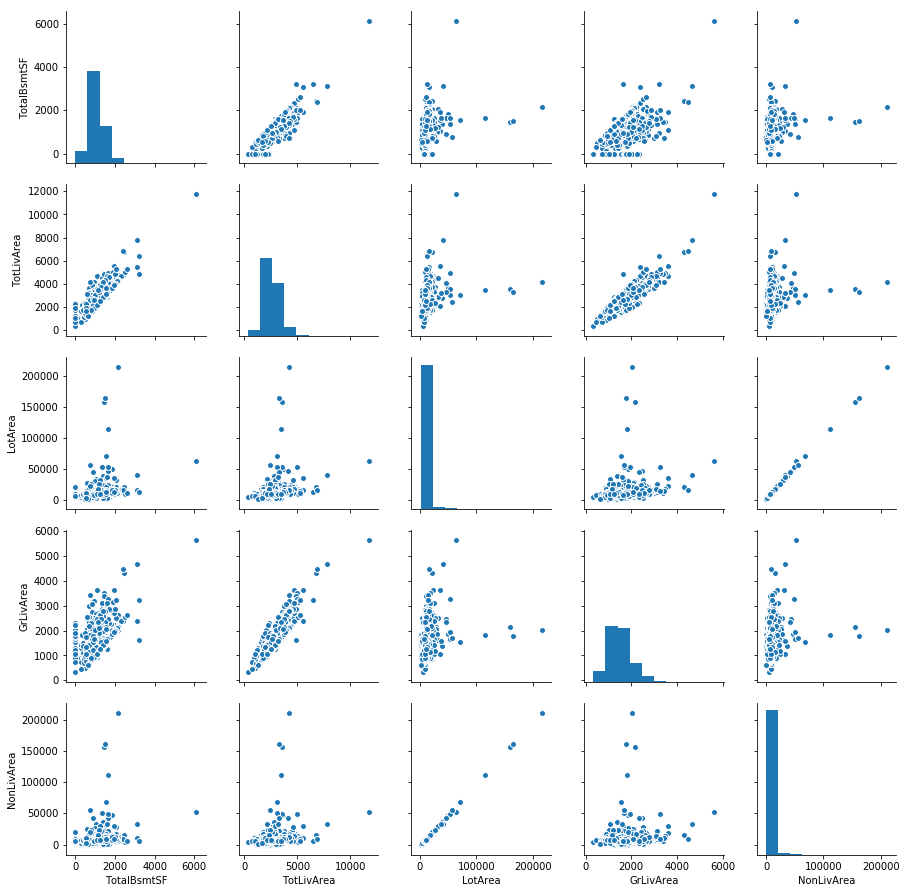

In [24]:
summ_sf = ['TotalBsmtSF', 'TotLivArea', 'LotArea', 'GrLivArea', 'NonLivArea']
sns.pairplot(train_df[summ_sf])

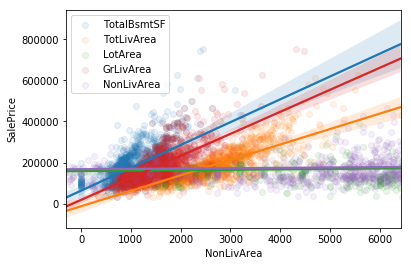

In [25]:
def plot_regs(features):
    for f in features:
        sns.regplot(x = train_df[f],
                    label =  f,
                    scatter_kws = {'alpha': 0.1},
                    y = train_df.SalePrice)
    plt.legend()

plot_regs(summ_sf)

In [26]:
summ_sf_to_drop = ['TotalBsmtSF','LotArea', 'GrLivArea', 'NonLivArea']
train_df = train_df.drop(summ_sf_to_drop, axis='columns')

TotLivArea      4
SalePrice       4
GarageArea      3
GarageCars      3
1stFlrSF        2
BsmtFullBath    1
BsmtFinSF1      1
dtype: int64

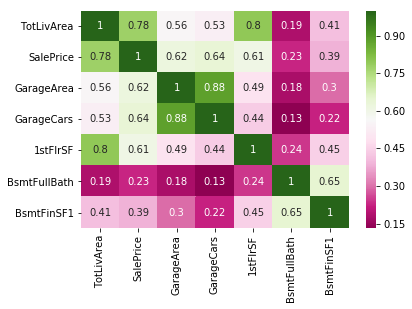

In [27]:
## features where its correlation with another feature is greater than 0.5, not counting its correlation with itself which is 1
is_dtype_num = train_df.dtypes.isin([np.dtype('float64'), np.dtype('int64')])
num_feats = train_df.dtypes.index[is_dtype_num]
num_df = train_df[num_feats]
high_corr_count = num_df.corr()[num_df.corr() > 0.5][num_df.corr() < 1].count().sort_values(ascending = False)
high_corr_count = high_corr_count[high_corr_count>0]
display(high_corr_count)
high_corr_feats = high_corr_count.index.values
sns.heatmap(train_df[high_corr_feats].corr(), annot = True, cmap = plt.get_cmap('PiYG'))

In [28]:
feats_to_drop = ['GarageCars', '1stFlrSF']
train_df = train_df.drop(columns = feats_to_drop)

### Imputing Nans

#### Nans that Add Information
Nan values are difficult to work with programmatically.The data description lists the following features as having nan value that add information unlike nans that mean a data point is unknown or missing. Those features describe physical structures that may not exist in a home. For example, a nan value in PoolQC means there is no pool. It stands to reason that if PoolQC is nan, then PoolArea should be nan or zero. Let's (1) spot check that those features do not contradict each other and (2) replace nan values in columns strings such as 'none' or the number zero. 


- Alley
- MasVnrType
- MasVnrArea
- BsmtQual 
- BsmtCond 
- BsmtExposure
- BsmtFinType1
- BsmtFinSF1 
- BsmtFinType2
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- BsmtFullBath
- BsmtHalfBath
- FireplaceQu  
- GarageType  
- GarageYrBlt  
- GarageFinish  
- GarageCars
- GarageArea 
- GarageQual 
- GarageCond 
- PoolQC 
- Fence 
- MiscFeature

In [29]:
dimm = train_df.shape
n_obs = dimm[0]
n_non_nans = train_df.count()
n_nans = n_obs - n_non_nans
feat_w_nan = n_nans[n_nans > 0]
print(feat_w_nan.sort_values(ascending=False))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
Length: 19, dtype: int64


In [30]:
def check_nans(name_of_feats):
    df = train_df[name_of_feats].copy()
    for n in name_of_feats:
        print(df[n].unique())
    if len(name_of_feats) > 2:
        for name in name_of_feats:
            mask = df.isnull().any(axis = 1)
            rows_w_nans_unique = df[mask].drop_duplicates()
        display('unique combination of column values for columns with nans')
        display(rows_w_nans_unique)
            
    elif len(name_of_feats) == 2:
        for n in name_of_feats:
            feat_is_numeric = (df[n].dtype == np.float64) or (df[n].dtype == np.int64)
            if feat_is_numeric:
                is_0 = df[n] == 0
                is__null = df[n].isnull() == False
                is_more_than_0 = df[n] > 0
                
                df[n] = df[n].astype('object')
                df[n] = df[n].fillna('nan')
                df[n][is_0] = 'zero'
                df[n][is_more_than_0] = 'not_0'
    
            else:
                df[n] = df[n].astype('object')
                df[n] = df[n].fillna('nan')
                
        display(pd.crosstab(index = df[name_of_feats[0]], 
                            columns = df[name_of_feats[1]]))
        
        display(pd.crosstab(index = df[name_of_feats[0]], 
                                columns = df[name_of_feats[1]], normalize = 'index'))
        

#### Pool
##### From Data Description:
>Pool Area (Continuous): Pool area in square feet
>
>Pool QC (Ordinal): Pool quality
>		
>       Ex	Excellent
>       Gd	Good
>       TA	Average/Typical
>       Fa	Fair
>       NA	No Pool

First, we are looking all the possible values that the attribute takes on. Perhaps one column includes nans and a value implying there is no pool. This would mean that the nans do not mean there is no pool but, rather, we do not know if there is a pool or there is a pool and we do not know the pool quality.

Second, we look at contingency tables to make sure that there are no rows where one attribute implies there is a pool and another implies the opposite. We can see that all 1453 rows where `PoolQC` = nan also have `PoolArea` = 0 and vice-versa. There is no discrepency.

In [31]:
pool_feats = ['PoolArea', 'PoolQC']
check_nans(pool_feats)

train_df.PoolQC = train_df.PoolQC.fillna('none')

[  0 512 648 576 555 480 519 738]
[nan 'Ex' 'Fa' 'Gd']


PoolQC,Ex,Fa,Gd,nan
PoolArea,,,,
not_0,2,2,3,0
zero,0,0,0,1453


PoolQC,Ex,Fa,Gd,nan
PoolArea,,,,
not_0,0.285714,0.285714,0.428571,0.0
zero,0.000000,0.000000,0.000000,1.0


#### Features Describing Fireplaces

##### From Data Description
>Fireplaces (Discrete): Number of fireplaces
>
>FireplaceQu (Ordinal): Fireplace quality
>
>       Ex	Excellent - Exceptional Masonry Fireplace
>       Gd	Good - Masonry Fireplace in main level
>       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
>       Fa	Fair - Prefabricated Fireplace in basement
>       Po	Poor - Ben Franklin Stove
>       NA	No Fireplace

In [32]:
check_nans(['Fireplaces', 'FireplaceQu'])

train_df.FireplaceQu = train_df.FireplaceQu.fillna('none')

check_nans(['Fireplaces', 'FireplaceQu'])

train_df.FireplaceQu = train_df.FireplaceQu.fillna('none')

[0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


FireplaceQu,Ex,Fa,Gd,Po,TA,nan
Fireplaces,,,,,,
0,0,0,0,0,0,690
1,19,28,324,20,259,0
2,4,4,54,0,53,0
3,1,1,2,0,1,0


FireplaceQu,Ex,Fa,Gd,Po,TA,nan
Fireplaces,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.029231,0.043077,0.498462,0.030769,0.398462,0.0
2,0.034783,0.034783,0.469565,0.000000,0.460870,0.0
3,0.200000,0.200000,0.400000,0.000000,0.200000,0.0


[0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]
['none' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


FireplaceQu,Ex,Fa,Gd,Po,TA,none
Fireplaces,,,,,,
0,0,0,0,0,0,690
1,19,28,324,20,259,0
2,4,4,54,0,53,0
3,1,1,2,0,1,0


FireplaceQu,Ex,Fa,Gd,Po,TA,none
Fireplaces,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.029231,0.043077,0.498462,0.030769,0.398462,0.0
2,0.034783,0.034783,0.469565,0.000000,0.460870,0.0
3,0.200000,0.200000,0.400000,0.000000,0.200000,0.0


In [33]:
def startswith_garage(string):
    return string.startswith('Garage')
garage_feats = train_df.columns.values[list(map(startswith_garage, train_df.columns.values))]

check_nans(garage_feats)

train_df.GarageType  = train_df.GarageType.fillna('none')
train_df.GarageYrBlt = train_df.GarageYrBlt.fillna('none')
train_df.GarageFinish = train_df.GarageFinish.fillna('none')
train_df.GarageQual = train_df.GarageQual.fillna('none')
train_df.GarageCond = train_df.GarageCond.fillna('none')

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
[Interval(2000, 2010, closed='right') Interval(1970, 1980, closed='right')
 Interval(1990, 2000, closed='right') Interval(1930, 1940, closed='right')
 Interval(1960, 1970, closed='right') Interval(1950, 1960, closed='right')
 Interval(1920, 1930, closed='right') Interval(1910, 1920, closed='right')
 nan Interval(1980, 1990, closed='right')
 Interval(1940, 1950, closed='right') Interval(1890, 1900, closed='right')
 Interval(1900, 1910, closed='right')]
['RFn' 'Unf' 'Fin' nan]
[ 548  460  608  642  836  480  636  484  468  205  384  736  352  840
  576  516  294  853  280  534  572  270  890  772  319  240  250  271
  447  556  691  672  498  246    0  440  308  504  300  670  826  386
  388  528  894  565  641  288  645  852  558  220  667  360  427  490
  379  297  283  509  405  758  461  400  462  420  432  506  684  472
  366  476  410  740  648  273  546  325  792  450  180  430  594  390
  540  264  530  435  453  750 

'unique combination of column values for columns with nans'

,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond
Id,,,,,,
40,NaN,NaN,NaN,0,NaN,NaN


### Basment
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

In [34]:
basement_feats = ['BsmtFullBath', 'BsmtHalfBath',
                  'BsmtQual', 'BsmtCond',
                  'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure']
check_nans(basement_feats)

train_df.BsmtQual = train_df.BsmtQual.fillna('none')
train_df.BsmtCond = train_df.BsmtCond.fillna('none')
train_df.BsmtFinType1 = train_df.BsmtFinType1.fillna('none')
train_df.BsmtFinType2 = train_df.BsmtFinType2.fillna('none')
train_df.BsmtExposure = train_df.BsmtExposure.fillna('none')

[1 0 2 3]
[0 1 2]
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['No' 'Gd' 'Mn' 'Av' nan]


'unique combination of column values for columns with nans'

,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinType2,BsmtExposure
Id,,,,,,,
18,0,0,NaN,NaN,NaN,NaN,NaN
333,1,0,Gd,TA,GLQ,NaN,No
949,0,0,Gd,TA,Unf,Unf,NaN


#### Fence
>Fence (Ordinal): Fence quality
>		
>       GdPrv	Good Privacy
>       MnPrv	Minimum Privacy
>       GdWo	Good Wood
>       MnWw	Minimum Wood/Wire
>       NA	No Fence

In [35]:
check_nans(['Fence'])

train_df.Fence = train_df.Fence.fillna('none')

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


### `MiscFeature`
From data description:
>MiscFeature: Miscellaneous feature not covered in other categories
>		
>       Elev	Elevator
>       Gar2	2nd Garage (if not described in garage section)
>       Othr	Other
>       Shed	Shed (over 100 SF)
>       TenC	Tennis Court
>       NA	None
>MiscVal: $Value of miscellaneous feature

In [36]:
check_nans(['MiscFeature', 'MiscVal'])

train_df.MiscFeature = train_df.MiscFeature.fillna('none')

[nan 'Shed' 'Gar2' 'Othr' 'TenC']
[    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]


MiscVal,not_0,zero
MiscFeature,,
Gar2,2,0
Othr,1,1
Shed,48,1
TenC,1,0
nan,0,1406


MiscVal,not_0,zero
MiscFeature,,
Gar2,1.000000,0.000000
Othr,0.500000,0.500000
Shed,0.979592,0.020408
TenC,1.000000,0.000000
nan,0.000000,1.000000


### `Alley`
>Alley: Type of alley access to property
>
>       Grvl	Gravel
>       Pave	Paved
>       NA 	No alley access

In [37]:
check_nans(['Alley'])

train_df.Alley = train_df.Alley.fillna('none')

[nan 'Grvl' 'Pave']


### Nan in Electrical Column
There is only one nan in this column. This is an anomoly. We will just drop this observation. The dataset contains 1460 observations, so dropping one is trivial. 

Electrical (Ordinal): Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [38]:
n_non_nan_Electrical = train_df['Electrical'].count()
# dataframe.count() returns the nbr of non-NA values
# df.count() is a Pandas data structure series. It is one-dimensional 
# labeled array capable of holding any data type.

n_nan_Electrical = n_obs - n_non_nan_Electrical

one_obs_with_nan_Electrical = train_df.Electrical.isnull()
train_df = train_df[one_obs_with_nan_Electrical == False]

In [39]:
train_df.shape

(1459, 76)

### Nans in `LotFrontage`
From data description:
>Lot Frontage (Continuous): Linear feet of street connected to property

In real estate, frontage is the width of a lot, measured at the front part of the lot. Every house has lot frontage. That means nans in that column means missing data. 

#### Dealing with Missing Data
At first glance, you would think you can just ignore the missing data and do your normal calculations. We have lot frontage for 1200 of the 1460 observations in the dataset. We can just make do with the average of the 1200 values that we do know. However, just acting as if those unknown values do not exist actually affect our calculations more than not. 

There is no one best way to handle missing data that works in all cases. Generally, one of our goals is to make our missing data be as innocuous as possible. Let's act as if those nan values equal the mean of the known data. 

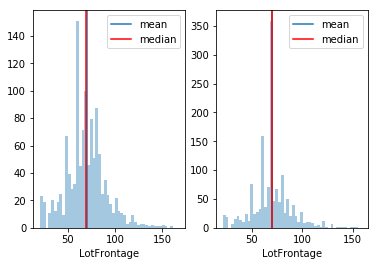

In [40]:
train_df.LotFrontage.count()

def hist_feat(feature):
    meann = feature.dropna().mean(); mediann = feature.dropna().median()
    minn = feature.min(); x_lim = meann + 4*feature.dropna().std()

    sns.distplot(feature.dropna(), kde=False, hist_kws = {'range': [minn, x_lim]})
    plt.axvline(meann, label = 'mean')
    plt.axvline(mediann, color = 'r', label = 'median')
    plt.legend()
    
def hist_before_nan_to_mean(feature):
    fig = plt.figure(); fig.add_subplot(1,2,1)
    hist_feat(feature)
    
    dummy = feature.copy()
    mask = dummy.isnull()
    meann = dummy.dropna().mean()
    dummy[mask] = meann
    
    fig.add_subplot(1,2,2)
    hist_feat(dummy)

hist_before_nan_to_mean(train_df.LotFrontage)

meann = train_df.LotFrontage.mean()
train_df.LotFrontage = train_df.LotFrontage.fillna(meann)

### `MasVnrType` and `MasVnrArea`
>MasVnrType: Masonry veneer type
>
>       BrkCmn	Brick Common
>       BrkFace	Brick Face
>       CBlock	Cinder Block
>       None	None
>       Stone	Stone
>	
>MasVnrArea: Masonry veneer area in square feet

There are two houses described as having some type of masonry veneer and masonry veneer areas of zero. That seems to be an error. Because there are only two observations with that error, we will just drop those two rows. 

In [41]:
masonry_veneer = ['MasVnrType', 'MasVnrArea']
check_nans(masonry_veneer)

pd.crosstab(index = train_df['MasVnrType'], columns = train_df['MasVnrArea'])

area_0_to_drop = train_df[train_df.MasVnrArea == 0]
stone_to_drop = area_0_to_drop[train_df.MasVnrType == 'Stone'].index.values
brickface_to_drop = area_0_to_drop[train_df.MasVnrType == 'BrkFace'].index.values

train_df = train_df.drop(stone_to_drop)
train_df = train_df.drop(brickface_to_drop)

no_mv = train_df[train_df.MasVnrType == 'None']
area_not_zero_to_drop = no_mv[no_mv.MasVnrArea > 0].index.values
train_df = train_df.drop(area_not_zero_to_drop)

train_df.MasVnrArea = train_df.MasVnrArea.fillna(0)
train_df.MasVnrType = train_df.MasVnrType.fillna('None')

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e

MasVnrArea,nan,not_0,zero
MasVnrType,,,
BrkCmn,0,15,0
BrkFace,0,444,1
None,0,5,858
Stone,0,127,1
nan,8,0,0


MasVnrArea,nan,not_0,zero
MasVnrType,,,
BrkCmn,0.0,1.000000,0.000000
BrkFace,0.0,0.997753,0.002247
None,0.0,0.005794,0.994206
Stone,0.0,0.992188,0.007812
nan,1.0,0.000000,0.000000


### Selecting Features Using Analysis of Variance (ANOVA)
ANOVA is a hypothesis test that tests if the mean of two populations are equal.
It is helpful to see if a feature is related to the `SalePrice`. For example, ANOVA implies that `OverallQual` matters because of the difference in the sale prices of home of low quality and homes of high quality. It is implying that the mean price of a home of low quality is not equal to that of a home of high quality. You can see this in comparing the distributions of sale prices by feature.

In [42]:
def my_anova(feature):
    feat_s = train_df[feature]
    sq_within = []
    
    for val in feat_s.unique():
        val_s = train_df.SalePrice[feat_s == val]
        sq_within_grp = (val_s - val_s.mean())**2
        sq_within = sq_within + list(sq_within_grp)
    
    SSW = np.sum(sq_within)
    
    sq_btwn = []; mean_total = train_df.SalePrice.mean()
    for val in feat_s.unique():
        sq_btwn_grp = (train_df.SalePrice[feat_s == val].mean() 
                       - mean_total)**2
        sq_btwn_grp = sq_btwn_grp * train_df.SalePrice[feat_s == val].shape[0]
        sq_btwn.append(sq_btwn_grp)
    
    SSB = np.sum(sq_btwn)    
    
    n = feat_s.shape[0]; m = len(feat_s.unique())
    df_W = (n-m)
    df_B = m-1
    
    mean_sq_btwn = SSB/df_B
    mean_sq_within = SSW/df_W
    
    F = mean_sq_btwn/mean_sq_within
    p = stats.f.sf(F, df_B, df_W)
    return F, p

In [43]:
pp = []
for f in cat_df:
    _, p = my_anova(f)
    pp.append(p)

pp = pd.concat([pd.Series(cat_df.columns.values),
                pd.Series(pp)], axis = 'columns')
pp.columns = ['feat', 'pvalue']

pp['ordered'] = pp.pvalue.rank(method = 'dense')

In [44]:
def anova_top(n_feats):
    return pp.sort_values(by = 'pvalue')[0:n_feats]

def anova_bottom(n_feats):
    not_null = pp.sort_values(by = 'pvalue').pvalue.isnull() == False
    return pp.sort_values(by = 'pvalue')[not_null][-n_feats:]

ANOVA says means are equal


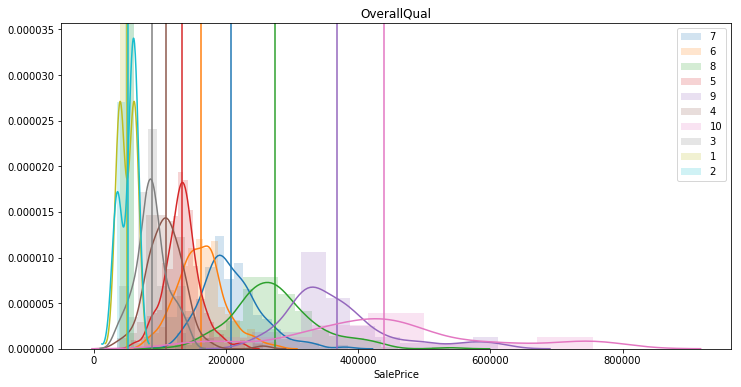

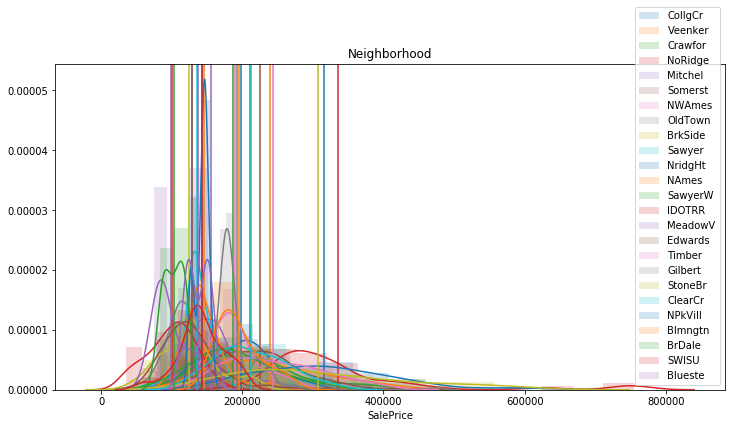

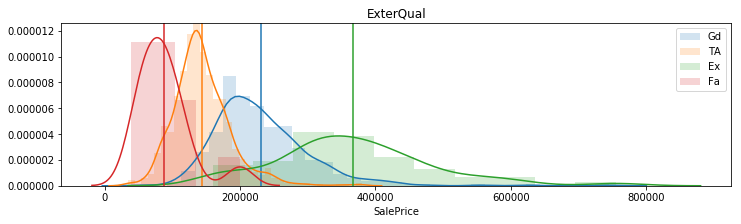

ANOVA says means are *not* equal


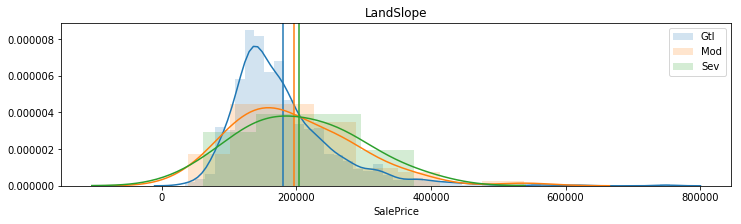

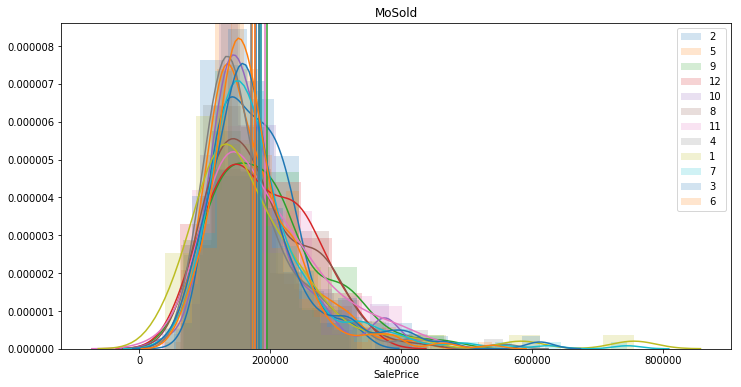

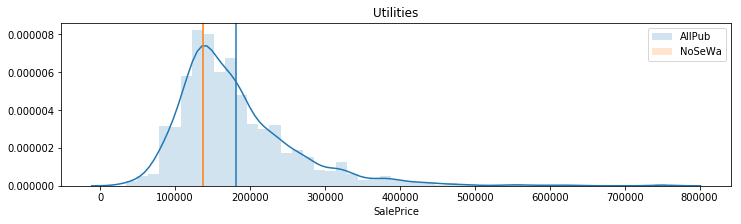

In [45]:
def get_handle_color_drop_alpha(handle):
    matplotlib_color_is_tuple = handle.get_facecolor()
    lists_are_mutable = list(matplotlib_color_is_tuple)
    col_drop_alpha = tuple(lists_are_mutable[:3])
    return col_drop_alpha

def chart_dist_cats(categories):
    for category in categories:
        values = train_df[category].unique()
        if len(values) > 6:
            scatter_plt = plt.figure(figsize = (12,6))
        else:
            scatter_plt = plt.figure(figsize = (12, 3))
    
        for val in values:
            price_df = train_df.SalePrice
            filter_for = train_df[category]
            prices_in_cat = price_df[filter_for == val]
            
            no_houses_sold = len(prices_in_cat) == 0
            if no_houses_sold:
                pass
            
            else:
                distplot_needs_more_than_1_obs = len(prices_in_cat) == 1
                if distplot_needs_more_than_1_obs:
                    prices_in_cat = prices_in_cat.append(prices_in_cat)
                    
                scatter_ax = sns.distplot(prices_in_cat, 
                                         norm_hist=True,
                                         kde=True,
                                         hist_kws = {'alpha': 0.2},
                                         label = str(val))
                
                handles, _ = scatter_ax.get_legend_handles_labels()
                val_handle = handles[-1]
                val_color = get_handle_color_drop_alpha(val_handle)
                plt.axvline(prices_in_cat.mean(), color = val_color)
        
        plt.title(category)
        plt.legend()
        plt.show()
print('ANOVA says means are equal')
chart_dist_cats(anova_top(3).feat.values)
print('ANOVA says means are *not* equal')
chart_dist_cats(anova_bottom(3).feat.values)

### Selecting Features Using Lasso

#### One-Hot Encoding Categorical Features Necessary for Lasso

In [46]:
cat_feats = cat_df.columns.values
lm_df = pd.get_dummies(data = train_df,
                       prefix = cat_feats,
                       columns = cat_feats)

#### Scaling Features Necessary for Feature Selection Using Linear Regression

In [47]:
X = lm_df.drop(columns = ['SalePrice'])
y = lm_df.SalePrice

X_scaled = preprocessing.scale(X.values)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)

y_scaled = preprocessing.scale(y.values)
y_scaled = pd.Series(y_scaled, index = y.index, name = y.name)

#### Lasso Using SciKitLearn Default Parameters

In [48]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_scaled, y_scaled)

coeff_df = pd.concat([pd.Series(lasso.coef_), 
                      pd.Series(abs(lasso.coef_)),
                      pd.Series(X_scaled.columns.values)], 
                      axis = 'columns')
coeff_df.columns = ['coeff', 'abs(coeff)','feat']
coeff_df = coeff_df.set_index('feat')
display(coeff_df.sort_values('abs(coeff)', ascending=False))


,coeff,abs(coeff)
feat,,
TotLivArea,0.437088,0.437088
GarageArea,0.105891,0.105891
BsmtQual_Ex,0.102708,0.102708
ExterQual_TA,-0.081062,0.081062
RoofMatl_ClyTile,-0.075855,0.075855
...,...,...
"YearRemodAdd_(1950, 1960]",-0.000000,0.000000
"YearRemodAdd_(1940, 1950]",-0.000000,0.000000
"YearRemodAdd_(1930, 1940]",0.000000,0.000000


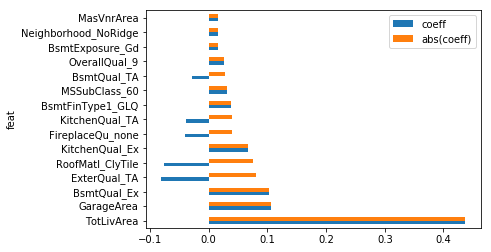

In [49]:
def lasso_top(n_feats):
    return coeff_df.sort_values('abs(coeff)', ascending=False)[0:n_feats]
lasso_top(15).plot.barh()

In [50]:
pd.options.display.max_rows = 15
display(anova_top(15).feat)

47     OverallQual
8     Neighborhood
20       ExterQual
23        BsmtQual
32     KitchenQual
49        FullBath
13       YearBuilt
37    GarageFinish
36     GarageYrBlt
34     FireplaceQu
53    TotRmsAbvGrd
22      Foundation
35      GarageType
14    YearRemodAdd
54      Fireplaces
Name: feat, dtype: object

In [51]:
list(zip(anova_top(15).feat.values, lasso_top(15).index.values))

[('OverallQual', 'TotLivArea'),
 ('Neighborhood', 'GarageArea'),
 ('ExterQual', 'BsmtQual_Ex'),
 ('BsmtQual', 'ExterQual_TA'),
 ('KitchenQual', 'RoofMatl_ClyTile'),
 ('FullBath', 'KitchenQual_Ex'),
 ('YearBuilt', 'FireplaceQu_none'),
 ('GarageFinish', 'KitchenQual_TA'),
 ('GarageYrBlt', 'BsmtFinType1_GLQ'),
 ('FireplaceQu', 'MSSubClass_60'),
 ('TotRmsAbvGrd', 'BsmtQual_TA'),
 ('Foundation', 'OverallQual_9'),
 ('GarageType', 'BsmtExposure_Gd'),
 ('YearRemodAdd', 'Neighborhood_NoRidge'),
 ('Fireplaces', 'MasVnrArea')]

### Storing `train_df` To Pass To Other Notebooks
We will grab this data frame, with all the data preparation in this notebook, by running ```%store -r train_df```.

In [52]:
whos DataFrame

Variable         Type         Data/Info
---------------------------------------
X                DataFrame          LotFrontage  MasVnr<...>[1452 rows x 420 columns]
X_scaled         DataFrame          LotFrontage  MasVnr<...>[1452 rows x 420 columns]
area_0_to_drop   DataFrame         MSZoning  LotFrontag<...>\n[860 rows x 76 columns]
cat_df           DataFrame         MSZoning Street Alle<...>n[1460 rows x 56 columns]
coeff_df         DataFrame                     coeff  a<...>n\n[420 rows x 2 columns]
lm_df            DataFrame          LotFrontage  MasVnr<...>[1452 rows x 421 columns]
no_mv            DataFrame         MSZoning  LotFrontag<...>\n[863 rows x 76 columns]
num_df           DataFrame          LotFrontage  MasVnr<...>n[1460 rows x 22 columns]
ordinal_df       DataFrame         MSSubClass OverallQu<...>n[1460 rows x 10 columns]
pp               DataFrame                feat         <...>\n\n[56 rows x 3 columns]
train_df         DataFrame         MSZoning  LotFrontag<...>

In [58]:
whos Series

Variable                      Type      Data/Info
-------------------------------------------------
feat_w_nan                    Series    LotFrontage      259\nAll<...>nLength: 19, dtype: int64
high_corr_count               Series    TotLivArea      4\nSalePr<...>nSF1      1\ndtype: int64
is_dtype_num                  Series    MSZoning        False\nLo<...>\nLength: 78, dtype: bool
n_nans                        Series    MSZoning           0\nLot<...>nLength: 76, dtype: int64
n_non_nans                    Series    MSZoning        1460\nLot<...>nLength: 76, dtype: int64
no_bin_nones                  Series    Id\n1       True\n2      <...>Length: 1460, dtype: bool
one_obs_with_nan_Electrical   Series    Id\n1       False\n2     <...>Length: 1460, dtype: bool
y                             Series    Id\n1       208500\n2    <...>ength: 1452, dtype: int64
y_scaled                      Series    Id\n1       0.349000\n2  <...>gth: 1452, dtype: float64


In [60]:
%store train_df
%store X_scaled
%store y_scaled
%store X
%store y

Stored 'train_df' (DataFrame)
Stored 'X_scaled' (DataFrame)
Stored 'y_scaled' (Series)
Stored 'X' (DataFrame)
Stored 'y' (Series)
